# Estimating Gestational Diabetes Onset
### Reverse Timeseries Forecasting

## Pre-processing

<ul>
	<li><a href="#Imports"><strong>Imports</strong></a></li>
	<li><a href="#Notebook-Settings"><strong>Notebook Settings</a></li>
	<li><a href="#Load-the-data"><strong>Loading the data</strong></a>
		<ul>
			<li>Setting the index</li>
			<li>Reverse the timeseries</li>
		</ul>
	</li>
    <li><a href="#Visualize"><strong>Visualize</strong></a>
		<ul>
			<li>Seasonal Decompose</li>
		</ul>
	</li>
    <li><a href="#Stationarity"><strong>Stationarity</strong></a>
		<ul>
			<li>Dickey Fuller Test</li>
		</ul>
	</li>
    <li><a href="#ACF-and-PACF"><strong>ACF and PACF</strong></a></li>
    <li><a href="#Model-1:-ARIMA"><strong>Model 1: ARIMA</strong></a>
		<ul>
    <li><a href="#Finding-ARIMA-Parameters">Finding ARIMA Parameters</a></li>
		</ul>
    </li>
</ul>


### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

from library.functions import jlcap_optimize_arima

### Notebook Settings

In [2]:
pd.set_option('display.max_rows', 500)

### Load the data

In [123]:
y = pd.read_csv('data/data_pre-processed.csv')
y.set_index('date_forward', inplace=True)

y_diff = pd.read_csv('data/data_stationary.csv')
y_diff.set_index('date_forward', inplace=True)

In [124]:
y.head()

,bg_fasting
date_forward,
2021-03-11,86.0
2021-03-12,85.0
2021-03-13,88.0
2021-03-14,93.0
2021-03-15,90.0


In [125]:
y.index = pd.DatetimeIndex(y.index, freq="D")
y_diff.index = pd.DatetimeIndex(y_diff.index, freq="D")
y.index

DatetimeIndex(['2021-03-11', '2021-03-12', '2021-03-13', '2021-03-14',
               '2021-03-15', '2021-03-16', '2021-03-17', '2021-03-18',
               '2021-03-19', '2021-03-20', '2021-03-21', '2021-03-22',
               '2021-03-23', '2021-03-24', '2021-03-25', '2021-03-26',
               '2021-03-27', '2021-03-28', '2021-03-29', '2021-03-30',
               '2021-03-31', '2021-04-01', '2021-04-02', '2021-04-03',
               '2021-04-04', '2021-04-05', '2021-04-06', '2021-04-07',
               '2021-04-08', '2021-04-09', '2021-04-10', '2021-04-11',
               '2021-04-12', '2021-04-13', '2021-04-14', '2021-04-15',
               '2021-04-16', '2021-04-17', '2021-04-18', '2021-04-19',
               '2021-04-20', '2021-04-21', '2021-04-22', '2021-04-23',
               '2021-04-24', '2021-04-25', '2021-04-26', '2021-04-27',
               '2021-04-28', '2021-04-29', '2021-04-30', '2021-05-01',
               '2021-05-02', '2021-05-03', '2021-05-04', '2021-05-05',
      

In [126]:
y_diff.head()

,bg_fasting
date_forward,
2021-03-12,-1.0
2021-03-13,3.0
2021-03-14,5.0
2021-03-15,-3.0
2021-03-16,-1.0


### Split Data into Training and Testing Sets

In [127]:
len(y)

74

In [128]:
split = int(np.floor(len(y)*.8))
split

59

In [129]:
y_train = y[:split]
y_test = y[split:]

In [130]:
len(y_train), len(y_test)

(59, 15)

## Model 1: ARIMA

### Finding ARIMA Parameters

In [253]:
ps = range(0,8)
qs = range(0,8)

jlcap_optimize_arima(y_train, ps, qs)

,Order,AIC
0,"(5, 1, 1)",14.000000
1,"(5, 1, 3)",323.960005
2,"(5, 1, 4)",325.173443
3,"(4, 1, 7)",325.787184
4,"(6, 1, 3)",325.948824


### Fitting a Model

In [234]:
mod = ARIMA(y_train, order=(5,1,3))
res = mod.fit()

print(res.summary())

                               SARIMAX Results                                
Dep. Variable:             bg_fasting   No. Observations:                   59
Model:                 ARIMA(5, 1, 3)   Log Likelihood                -152.980
Date:                Tue, 01 Mar 2022   AIC                            323.960
Time:                        14:45:47   BIC                            342.504
Sample:                    03-11-2021   HQIC                           331.183
                         - 05-08-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9879      0.172     -5.760      0.000      -1.324      -0.652
ar.L2         -1.2647      0.205     -6.170      0.000      -1.667      -0.863
ar.L3         -1.3992      0.150     -9.331      0.0

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


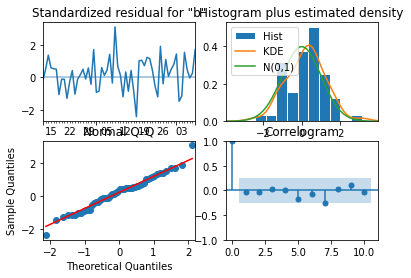

In [235]:
res.plot_diagnostics()
plt.show()

### Predictions

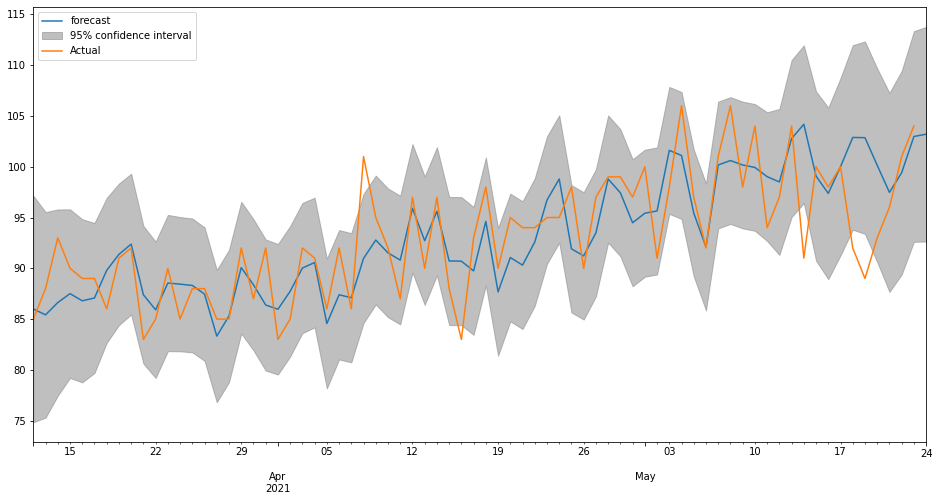

In [284]:
fig, ax = plt.subplots(figsize=(16, 8))

fig = plot_predict(res, start="2021-03-12", end="2021-05-24", ax=ax)
ax.plot(y, label='Actual')
legend = ax.legend(loc="upper left")

In [249]:
predictions = res.forecast(steps=len(y_test))
predictions.rename('bg_fasting', inplace=True)

2021-05-09    100.166897
2021-05-10     99.928254
2021-05-11     99.021418
2021-05-12     98.499858
2021-05-13    102.771356
2021-05-14    104.176964
2021-05-15     99.075933
2021-05-16     97.372536
2021-05-17     99.999698
2021-05-18    102.878774
2021-05-19    102.855969
2021-05-20    100.142154
2021-05-21     97.471400
2021-05-22     99.409716
2021-05-23    102.971825
Freq: D, Name: bg_fasting, dtype: float64

In [250]:
preds = pd.DataFrame(predictions)
preds.tail()

,bg_fasting
2021-05-19,102.855969
2021-05-20,100.142154
2021-05-21,97.471400
2021-05-22,99.409716
2021-05-23,102.971825


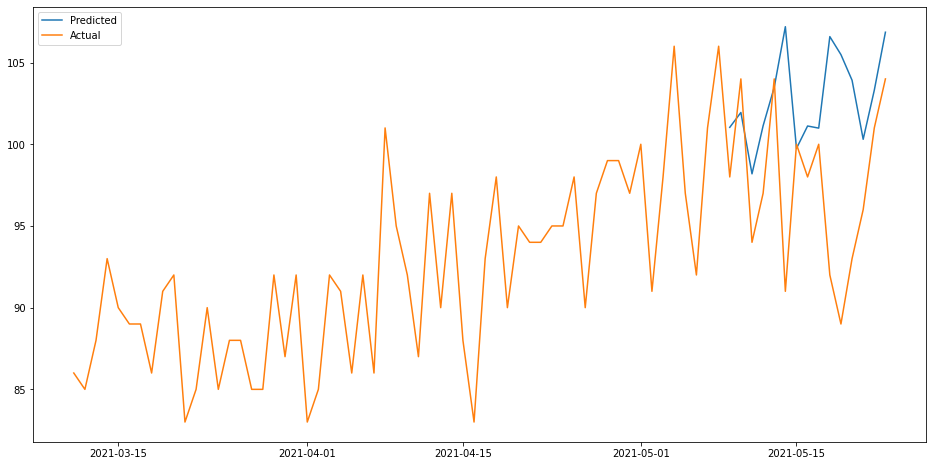

In [274]:
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(y_pred, label='Predicted')
ax.plot(y, label='Actual')
legend = ax.legend(loc="upper left")

<AxesSubplot:xlabel='date_forward'>

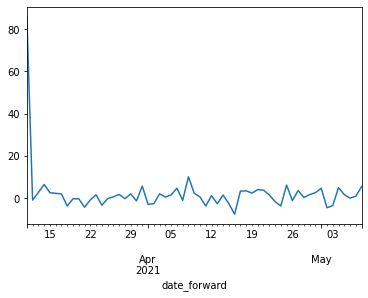

In [254]:
res.resid.plot()


In [287]:
from sklearn.metrics import mean_squared_error

In [290]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

7.988498317492948

**TODO**

<ul>
    <li>maybe focus on predicting from the data before meds began</li>
</ul>

In [92]:

from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing



In [99]:
simpleExpSmooth_model = SimpleExpSmoothing(y_train).fit()
doubleExpSmooth_model = ExponentialSmoothing(y_train).fit()
tripleExpSmooth_model = ExponentialSmoothing(y_train).fit()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [100]:
predictions_simpleExpSmooth_model = simpleExpSmooth_model.forecast(6)
predictions_doubleExpSmooth_model = doubleExpSmooth_model.forecast(6)
predictions_tripleExpSmooth_model = tripleExpSmooth_model.forecast(6)

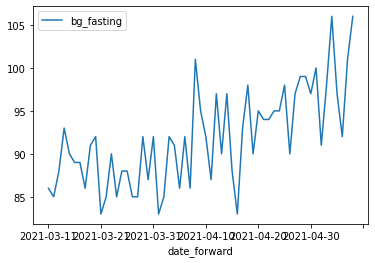

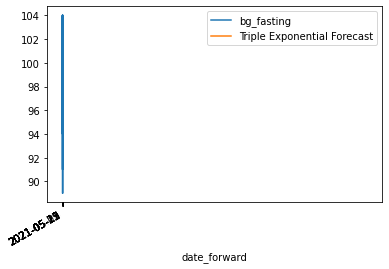

In [110]:

y_train.plot(legend=True,label='TRAIN')
y_test.plot(legend=True,label='TEST')
# predictions_simpleExpSmooth_model.plot(legend=True,label='Simple Exponential Forecast')
# predictions_doubleExpSmooth_model.plot(legend=True,label='Double Exponential Forecast')
predictions_tripleExpSmooth_model.plot(legend=True,label='Triple Exponential Forecast')

plt.show()

In [152]:
# Calculate differences
differences = y_train.diff().dropna()

# Select start price
start = y_train.first('D')

# Calculate cumulative sum
cumulative_sum = start.append(differences).cumsum()

# Validate cumulative sum equals data
print(y_train.equals(cumulative_sum))


True
